---
---

# **1 - Naive Bayes Theory and NLP**

---
**Bayes Theorem**

---

Naive Bayes is the shorthand for a set of algorithms that use Bayes Theorem for supervised learning classification.

Bayes Theorem is a probability formula that leverages previously known probabilites to define probability of related events occuring.

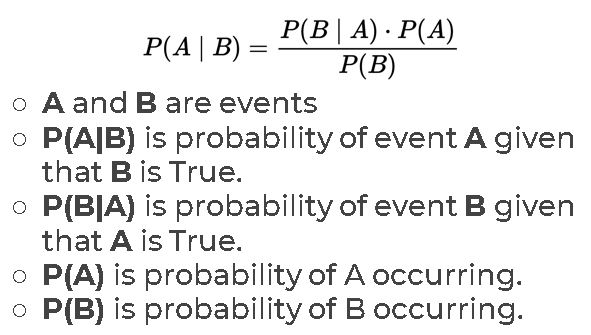

**Imagine the following situation for a city:**

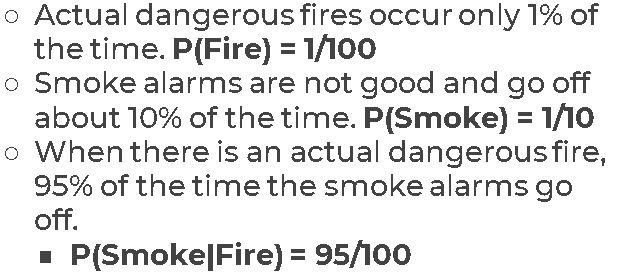

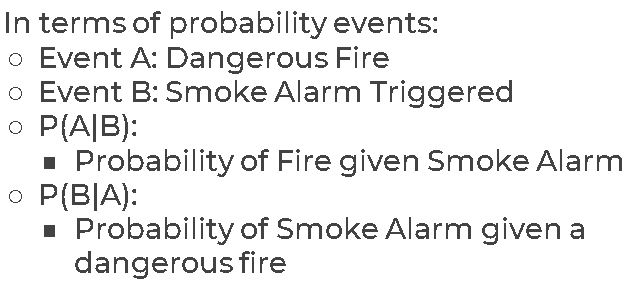

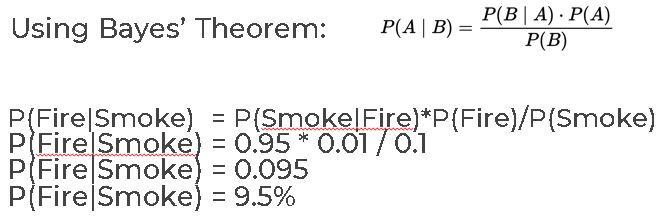

We focus on using Bayes Theorem for Natural Language Processing Classification

---
**Naive Bayes Classifier**

---

We model the **probability of belonging** to a class given a **vector of features**

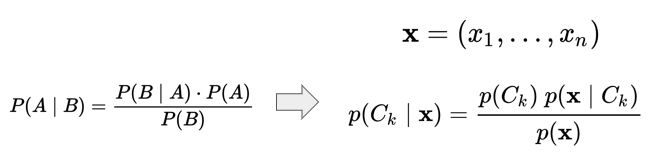

The **numerator** is equivalent to a **joint probability** model

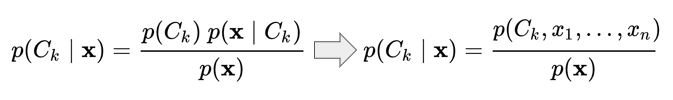

The **chain rule** can rewrite this **numerator** as a **series of products** of **conditional probabilities**

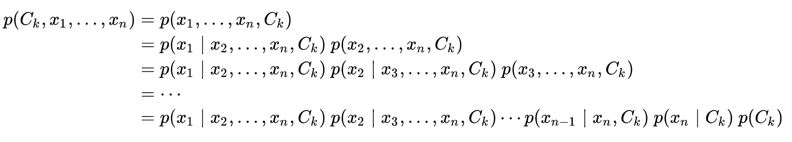

We assume all **x features** are **mutually independent** of **each other**. Allowing for this conditional probability

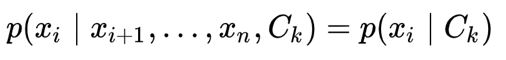

The **joint model** (the full Naive Bayes model) is fully written as:

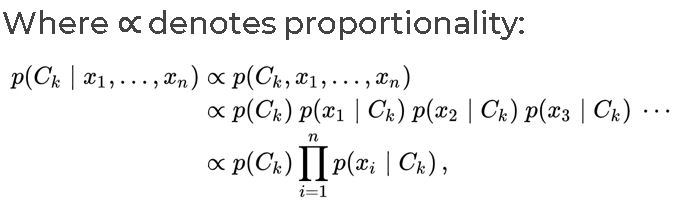



---
**How Multinomial Naive Bayes works in NLP**

---


There are many variations of Naive Bayes models, including:
* Multinomial Naive Bayes (used most often in NLP)
* Gaussian Naive Bayes
* Complement Naive Bayes
* Bernoulli Naive Bayes
* Categorical Naive Bayes

Let's imagine we want to create a movie review aggregation website where we need to classify movie reviews into to categories: positive or negative.

Using previous reviews, we can have someone manually label them in order to create a labeled data set. Then in the future, we could use our machine learning algorithm to automatically classify a new text review for us.

But how do we actually train on this text data?

**Multinomial Naive Bayes** can work quite well with a simple count **vectorization** model (**counting the frequency of each word** in each document).

---

1. Begin by separating out classes and create "prior" probabilities for each class:

  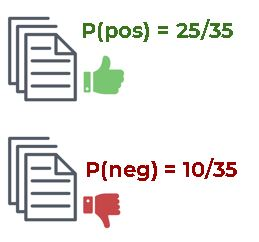


---
2. Start with count vectorization on classes: 

  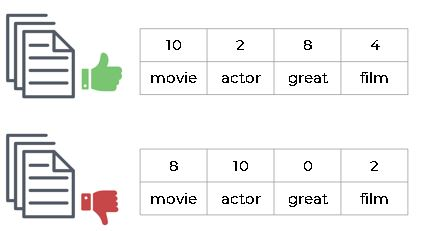

---
3. Calculate conditional probabilites per class and word.

  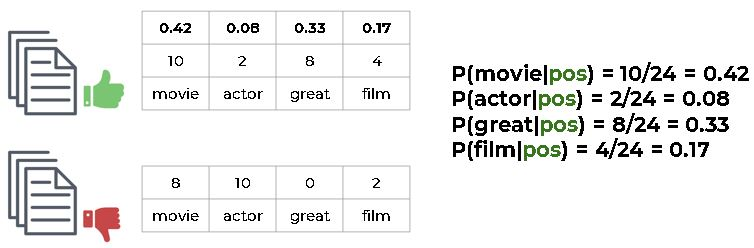
  
  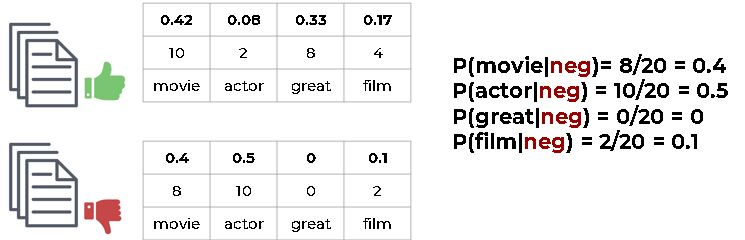

---
4. Now a new review was created. 
 
  Start with **prior probability**, then continue with **conditional probabilities** to calculate **score factor**: 

  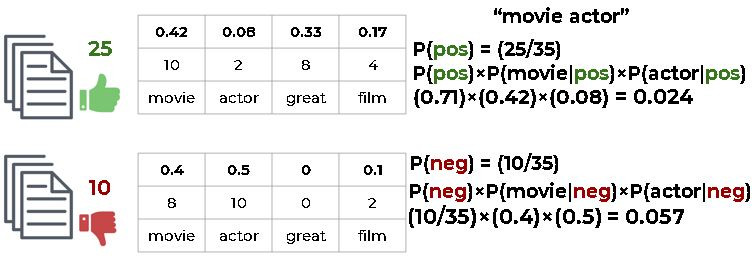


---
5. Compare both score against each other:

  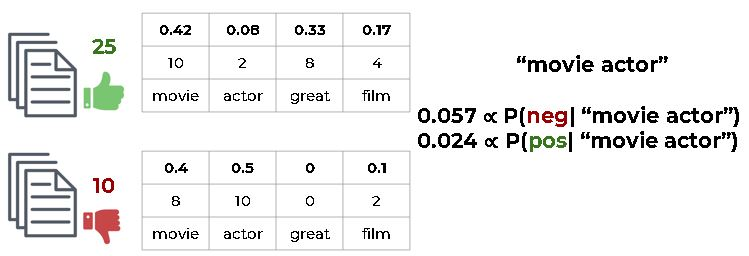

  Classify based on highest score, this is classified as **negative** review

---
**What about 0 count words?**

---

The probability is zero, regardless of text.

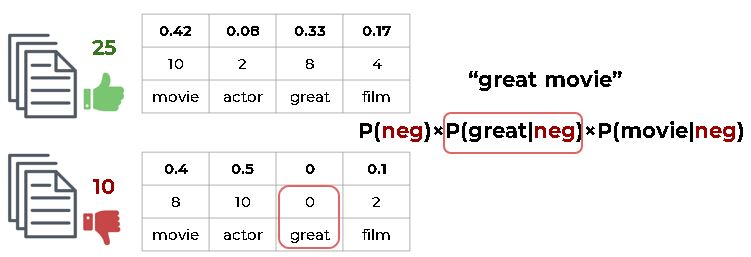

To overcome this we add alpha smoothing parameter to add counts:

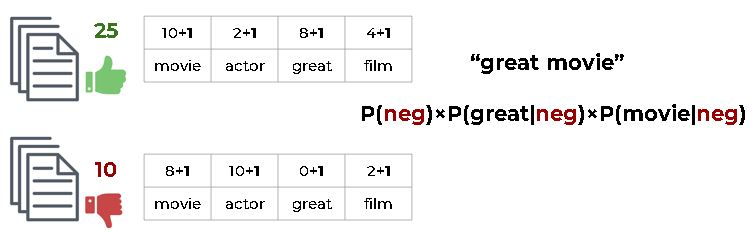

Then **recalculate conditional probabilities**.

**NOTE: how a higher alpha value will be more "smoothing", but giving each word less distinct importance**

---
---

# **2 - Feature Extraction from Text**

---
**Feature Extraction**

---

Most classic machine learning algorithms cant take in raw text as data.

Instead we need to perform a **feature extraction** from the raw text in order to pass numerical features to the machine learning algorithm.

**Main methods for Feature Extraction:**
* Count Vectorization
* TF-IDF (Term Frequency - Inverse Document Frequency)

---
**1. Count Vectorization**

  1. Select data/documents 

    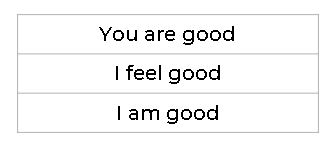

  2. Create a vocabulary of all possible words

    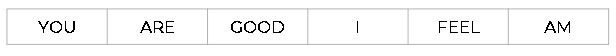

  3. Create a vector of frequency counts

    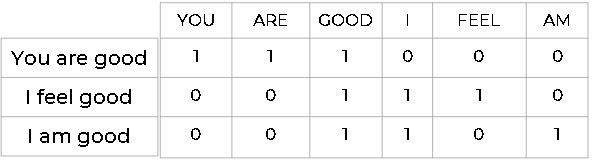


**Count vectorization** this message:

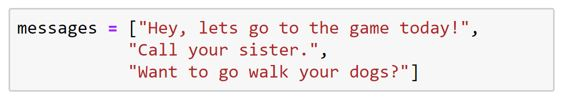

Then transform to 
**Document Term Matrix (DTM)**:

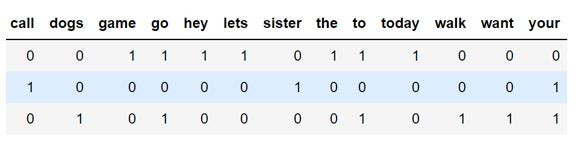

**Count Vectorization** treats every word as a feature, with the **frequency counts** acting as a "strength" of the feature/word.

For larger documents, matrices are stored as a **sparse matrix** to save space, since so many values will be zero.

**Issues to consider:**
* Very common words (e.g "a", "the", "about").
* Words common to a particular set of documents(e.g. "run" in a set of different sport articles.

**Stop Words** are words **common** enough throughout a language that its usually **safe to remove** them and not consider them as important. Most NLP libraries have a built-in list of common stop words

We can address the issue of document frequency by using a **TF-IDF Vectorization** process. Instead of filling the DTM with word frequency counts it **calculates** **term frequency-inverse document frequency** value for each word.

---
**2. TF-IDF (Term Frequency - Inverse Document Frequency)**

**Term Frequency tf(t, d)** is the raw count of a term in a document (the number of times that term **t** occurs in document **d**).

Because the term **"the"** is so **common**, term frequency will tend to **incorrectly** emphasize documents which happent to use the word **"the"** more frequently, without giving enough weight to the more **meaningful terms** **"red"** and **"dogs"**.

We also need to consider a group of documents where non stop words are common throughout all the documents (the word **"run"** in documents about various sports).

So we need an **Inverse Document Frequency (IDF)** factor is incorporated which **diminishes the weight of terms** that occur very **frequently** in the document set and **increases** the **weight of terms that occur rarely**.

The IDF is how common or rare a world is in the entire document set. The closer it is to 0, the more common a word is. Calculated by taking the **total number of documents, dividing it by the number of documents that contain a word, and calculating the log**.

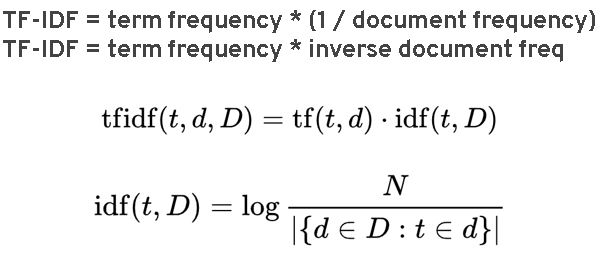

TF-IDF allows us to understand the context of words across an entire corpus of documents, instead of just its relative importance in a single document.

---

## **A. Core Concepts on Feature Extraction**


In this section we'll use basic Python to build a rudimentary NLP system. We'll build a *corpus of documents* (two small text files), create a *vocabulary* from all the words in both documents, and then demonstrate a *Bag of Words* technique to extract features from each document.


For simplicity we won't use any punctuation in the text files One.txt and Two.txt. Let's quickly open them and read them. Keep in mind, you should avoid opening and reading entire files if they are very large, as Python could just display everything depending on how you open the file.


In [ ]:
text_one = '/content/drive/MyDrive/Data_Science/Materi/Notes/14_Naive_Bayes_and_NLP/One.txt'
text_two = '/content/drive/MyDrive/Data_Science/Materi/Notes/14_Naive_Bayes_and_NLP/Two.txt'

### **a. Reading entire text as a string**

In [ ]:
with open(text_one) as mytext:
    entire_text = mytext.read()

In [ ]:
entire_text

'This is a story about dogs\nour canine pets\nDogs are furry animals\n'

In [ ]:
print(entire_text)

This is a story about dogs
our canine pets
Dogs are furry animals



---

### **b. Reading Each Line as a List**

In [ ]:
with open(text_one) as mytext:
    lines = mytext.readlines()

In [ ]:
lines

['This is a story about dogs\n',
 'our canine pets\n',
 'Dogs are furry animals\n']

---

### **c. Reading in Words Separately**

In [ ]:
with open(text_one) as f:
    words = f.read().lower().split()

In [ ]:
len(words)

13

In [ ]:
words

['this',
 'is',
 'a',
 'story',
 'about',
 'dogs',
 'our',
 'canine',
 'pets',
 'dogs',
 'are',
 'furry',
 'animals']

---

### **d. Building a vocabulary (Creating a "Bag of Words")**

Let's create dictionaries that correspond to unique mappings of the words in the documents. We can begin to think of this as mapping out all the possible words available for all (both) documents.

In [ ]:
with open(text_one) as f:
    words_one = f.read().lower().split()
    uni_words_one = set(words_one) # set -> unordered collection of unique objects

In [ ]:
uni_words_one

{'a',
 'about',
 'animals',
 'are',
 'canine',
 'dogs',
 'furry',
 'is',
 'our',
 'pets',
 'story',
 'this'}

**Repeat for Two.txt**

In [ ]:
with open(text_two) as f:
    words_two = f.read().lower().split()
    uni_words_two = set(words_two)

In [ ]:
uni_words_two

{'a',
 'about',
 'catching',
 'fun',
 'is',
 'popular',
 'sport',
 'story',
 'surfing',
 'this',
 'water',
 'waves'}

**Get all unique words across all documents**

In [ ]:
all_uni_words = set()
all_uni_words.update(uni_words_one)
all_uni_words.update(uni_words_two)

In [ ]:
all_uni_words

{'a',
 'about',
 'animals',
 'are',
 'canine',
 'catching',
 'dogs',
 'fun',
 'furry',
 'is',
 'our',
 'pets',
 'popular',
 'sport',
 'story',
 'surfing',
 'this',
 'water',
 'waves'}

**Create Vocab Dict**

In [ ]:
full_vocab = dict()
i = 0

for word in all_uni_words:
    full_vocab[word] = i
    i = i+1

In [ ]:
# Do not expect this to be in alphabetical order! 
# The for loop goes through the set() in the most efficient way possible, not in alphabetical order!
full_vocab

{'a': 15,
 'about': 1,
 'animals': 0,
 'are': 6,
 'canine': 16,
 'catching': 2,
 'dogs': 14,
 'fun': 4,
 'furry': 9,
 'is': 18,
 'our': 3,
 'pets': 11,
 'popular': 5,
 'sport': 12,
 'story': 13,
 'surfing': 8,
 'this': 7,
 'water': 17,
 'waves': 10}

---

### **e. Bag of Words to Frequency Counts**

Now that we've encapsulated our "entire language" in a dictionary, let's perform *feature extraction* on each of our original documents:

**Empty counts per doc**

In [ ]:
# Create list of 0 with length of full vocab
one_freq = [0] * len(full_vocab)
two_freq = [0] * len(full_vocab)

# Create list of empty string with length of full vocab
all_words = [''] * len(full_vocab)

In [ ]:
one_freq

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
two_freq

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
all_words

['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

**Create List of Words from Vocab**

In [ ]:
# Add word in dictionary to list (19 row and 1 column)
for word in full_vocab:
    all_words[full_vocab[word]] = word    

In [ ]:
all_words

['animals',
 'about',
 'catching',
 'our',
 'fun',
 'popular',
 'are',
 'this',
 'surfing',
 'furry',
 'waves',
 'pets',
 'sport',
 'story',
 'dogs',
 'a',
 'canine',
 'water',
 'is']

**Add in counts per word per doc:**

In [ ]:
# map the frequencies of each word in 1.txt to our vector:
with open(text_one) as f:
    one_text = f.read().lower().split()

# Count word in text_one based on full_vocab  
for word in one_text:
    one_freq[full_vocab[word]] += 1

In [ ]:
one_freq

[1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 2, 1, 1, 0, 1]

In [ ]:
# Do the same for the second document:
with open(text_two) as f:
    two_text = f.read().lower().split()

# Count word in text_two based on full_vocab
for word in two_text:
    two_freq[full_vocab[word]] += 1

In [ ]:
two_freq

[0, 1, 1, 0, 1, 1, 0, 1, 2, 0, 1, 0, 1, 1, 0, 1, 0, 1, 3]

**Create Bag of Words**

In [ ]:
import pandas as pd

In [ ]:
bag_of_words = pd.DataFrame([one_freq,two_freq], columns=all_words)

In [ ]:
bag_of_words

,animals,about,catching,our,fun,popular,are,this,surfing,furry,waves,pets,sport,story,dogs,a,canine,water,is
0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,2,1,1,0,1
1,0,1,1,0,1,1,0,1,2,0,1,0,1,1,0,1,0,1,3


By comparing the vectors we see that some words are common to both, some appear only in `One.txt`, others only in `Two.txt`. Extending this logic to tens of thousands of documents, we would see the vocabulary dictionary grow to hundreds of thousands of words. Vectors would contain mostly zero values, making them **sparse matrices**.




---

## **B. Feature Extraction with Scikit-Learn**



In [ ]:
text = ['This is a line',
        "This is another line",
        "Completely different line"]

In [ ]:
text

['This is a line', 'This is another line', 'Completely different line']

---

### **a. CountVectorizer**

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer, CountVectorizer

In [ ]:
cv = CountVectorizer()

In [ ]:
cv.fit_transform(text)

<3x6 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [ ]:
# stored as sparse matrix to reduce memory usage (by not store 0 count)
sparse_mat = cv.fit_transform(text) 

In [ ]:
sparse_mat.todense()

matrix([[0, 0, 0, 1, 1, 1],
        [1, 0, 0, 1, 1, 1],
        [0, 1, 1, 0, 1, 0]])

In [ ]:
# Check index of words
cv.vocabulary_

{'another': 0, 'completely': 1, 'different': 2, 'is': 3, 'line': 4, 'this': 5}

In [ ]:
cv = CountVectorizer(stop_words='english') # remove common words

In [ ]:
cv.fit_transform(text).todense()

matrix([[0, 0, 1],
        [0, 0, 1],
        [1, 1, 1]])

In [ ]:
cv.vocabulary_

{'completely': 0, 'different': 1, 'line': 2}

---

### **b. TfidfTransformer**

TfidfVectorizer is used on sentences, while TfidfTransformer is used on an existing count matrix, such as one returned by CountVectorizer

In [ ]:
tfidf = TfidfTransformer()

In [ ]:
cv = CountVectorizer()

In [ ]:
counts = cv.fit_transform(text)

In [ ]:
counts

<3x6 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [ ]:
result = tfidf.fit_transform(counts)

In [ ]:
result.todense()

matrix([[0.        , 0.        , 0.        , 0.61980538, 0.48133417,
         0.61980538],
        [0.63174505, 0.        , 0.        , 0.4804584 , 0.37311881,
         0.4804584 ],
        [0.        , 0.65249088, 0.65249088, 0.        , 0.38537163,
         0.        ]])

In [ ]:
# Check index of words
cv.vocabulary_

{'another': 0, 'completely': 1, 'different': 2, 'is': 3, 'line': 4, 'this': 5}

**YOU CAN USE PIPELINE TO EASE THE WORK**

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipe = Pipeline([('cv',CountVectorizer()), 
                 ('tfidf',TfidfTransformer())])

In [ ]:
results = pipe.fit_transform(text)

In [ ]:
results

<3x6 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [ ]:
results.todense()

matrix([[0.        , 0.        , 0.        , 0.61980538, 0.48133417,
         0.61980538],
        [0.63174505, 0.        , 0.        , 0.4804584 , 0.37311881,
         0.4804584 ],
        [0.        , 0.65249088, 0.65249088, 0.        , 0.38537163,
         0.        ]])

In [ ]:
# Check index of words
pipe[0].vocabulary_

{'another': 0, 'completely': 1, 'different': 2, 'is': 3, 'line': 4, 'this': 5}

---

### **c. TfIdfVectorizer**

Does both above in a single step!

In [ ]:
tfidf = TfidfVectorizer()

In [ ]:
results = tfidf.fit_transform(text)

In [ ]:
results.todense()

matrix([[0.        , 0.        , 0.        , 0.61980538, 0.48133417,
         0.61980538],
        [0.63174505, 0.        , 0.        , 0.4804584 , 0.37311881,
         0.4804584 ],
        [0.        , 0.65249088, 0.65249088, 0.        , 0.38537163,
         0.        ]])

In [ ]:
# Check index of words
tfidf.vocabulary_

{'another': 0, 'completely': 1, 'different': 2, 'is': 3, 'line': 4, 'this': 5}

---
---

# **2 - NLP and Supervised Learning**

Classification of Text Data

## **A. Data Set**

Source: https://www.kaggle.com/crowdflower/twitter-airline-sentiment?select=Tweets.csv

This data originally came from Crowdflower's Data for Everyone library.

As the original source says,

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

#### The Goal: Create a Machine Learning Algorithm that can predict if a tweet is positive, neutral, or negative. In the future we could use such an algorithm to automatically read and flag tweets for an airline for a customer service agent to reach out to contact.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data_Science/Materi/Notes/14_Naive_Bayes_and_NLP/airline_tweets.csv")

In [ ]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
df.shape

(14640, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [ ]:
df[['airline_sentiment', 'text']].isnull().sum()

airline_sentiment    0
text                 0
dtype: int64

We will use text as a feature and sentiment as a label/class

---

## **B. Exploratory Data Analysis**

### **a. Label Count**

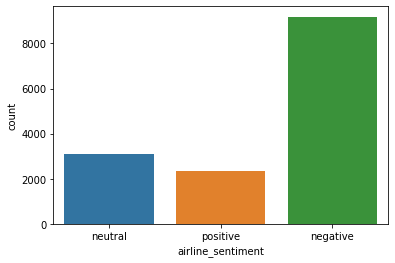

In [ ]:
sns.countplot(data=df, x='airline_sentiment');

In [ ]:
df['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

Most sentiment from tweet are negative

---

### **b. Features Count (Why the negative sentiment is big?)**

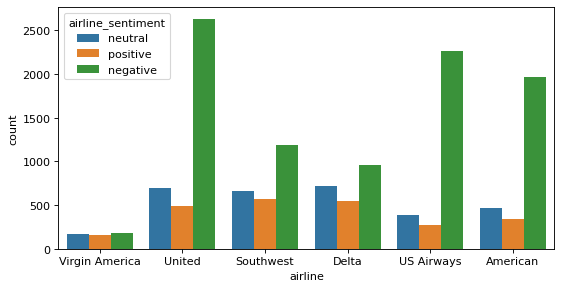

In [ ]:
plt.figure(figsize=(8,4), dpi=80)
sns.countplot(data=df, x='airline', hue='airline_sentiment');

The sentiment tends to be negative in all airlines except Virgin America airline.

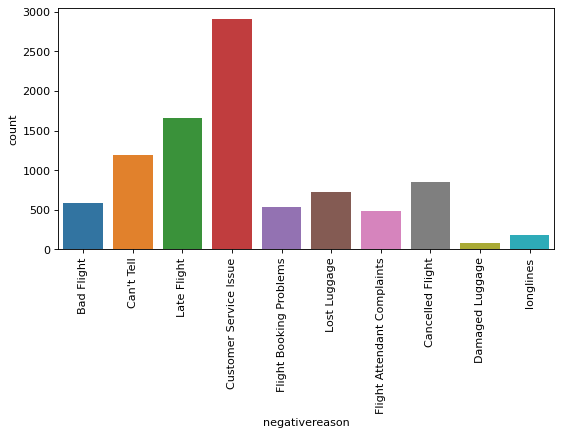

In [ ]:
plt.figure(figsize=(8,4), dpi=80)
sns.countplot(data=df, x='negativereason')
plt.xticks(rotation=90);

The most negative sentiment came from bad customer service

---

## **C. Machine Learning Model**

### **a. Setup**

We use text as a feature and sentiment as a label/class

In [ ]:
data = df[['airline_sentiment','text']]

In [ ]:
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [ ]:
X = df['text']
y = df['airline_sentiment']

---

#### Stratified Train | Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=np.array(y))

In [ ]:
X_train.shape

(11712,)

In [ ]:
X_test.shape

(2928,)

---

#### **TF-IDF Vectorization**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer(stop_words='english')

In [ ]:
# Fit to calculate statistical information from training data then transform based that data
X_train_tfidf = tfidf.fit_transform(X_train)

In [ ]:
X_train_tfidf

<11712x12932 sparse matrix of type '<class 'numpy.float64'>'
	with 107094 stored elements in Compressed Sparse Row format>

In [ ]:
X_test_tfidf = tfidf.transform(X_test)

**DO NOT USE .todense() for such a large sparse matrix!!!**

---

### **b. Base Model Comparisons**

#### **Create Estimator/Model**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=1000)
log.fit(X_train_tfidf, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_train_tfidf, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

---

#### **Performance Evaluation**

In [ ]:
from sklearn.metrics import plot_confusion_matrix,classification_report

In [ ]:
def report(model):
    preds = model.predict(X_test_tfidf)
    plot_confusion_matrix(model,X_test_tfidf,y_test, values_format='d')
    print(classification_report(y_test,preds))

NB MODEL
              precision    recall  f1-score   support

    negative       0.67      0.99      0.80      1836
     neutral       0.75      0.14      0.24       620
    positive       0.91      0.18      0.30       472

    accuracy                           0.68      2928
   macro avg       0.77      0.44      0.45      2928
weighted avg       0.73      0.68      0.60      2928



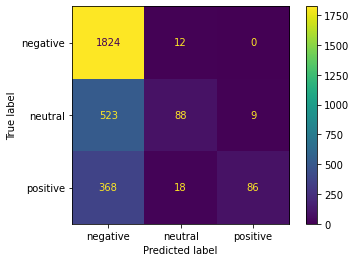

In [ ]:
print("NB MODEL")
report(nb)

Logistic Regression
              precision    recall  f1-score   support

    negative       0.81      0.92      0.86      1836
     neutral       0.63      0.47      0.54       620
    positive       0.79      0.63      0.70       472

    accuracy                           0.78      2928
   macro avg       0.74      0.68      0.70      2928
weighted avg       0.77      0.78      0.77      2928



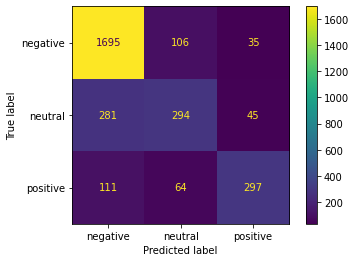

In [ ]:
print("Logistic Regression")
report(log)

SVC
              precision    recall  f1-score   support

    negative       0.84      0.89      0.86      1836
     neutral       0.62      0.53      0.57       620
    positive       0.74      0.69      0.71       472

    accuracy                           0.78      2928
   macro avg       0.73      0.70      0.72      2928
weighted avg       0.77      0.78      0.78      2928



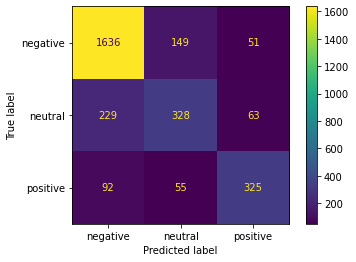

In [ ]:
print('SVC')
report(svc)

The Linear SVC has better performance on balancing the recall on all tweets. So we will use this as final model.

**Note: you can use grid search for best hyper-parameter tuning before finalizing the model**

---

## **D. Finalizing a PipeLine for Deployment on  New Tweets**

If we were satisfied with a model's performance, we should set up a pipeline that can take in a tweet directly and dont forget to train on all data.

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipe = Pipeline([('tfidf',TfidfVectorizer()), 
                 ('svc',LinearSVC())])

In [ ]:
pipe.fit(X, y)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('svc',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
               

In [ ]:
new_tweet = ['@luna good flight']
pipe.predict(new_tweet)

array(['positive'], dtype=object)

In [ ]:
new_tweet = ['@luna bad flight']
pipe.predict(new_tweet)

array(['negative'], dtype=object)

In [ ]:
new_tweet = ['@luna ok flight']
pipe.predict(new_tweet)

array(['neutral'], dtype=object)